# STEP 1: Import Library's

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# set the style of matplotlib to seaborn
sns.set_theme()


# STEP 2: Load the Data

In [2]:
# Load out trainig data set 

data = pd.read_csv("cs9856-spotify-regression-problem-2022/CS98XRegressionTrain.csv")
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [3]:
data.shape

(453, 15)

In [4]:
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


# STEP 3: Handle Missing Values

In [6]:
# Percentage of missing data is given by 

np.round( data.isna().sum() / data.shape[0] *100 ) 

Id           0.0
title        0.0
artist       0.0
top genre    3.0
year         0.0
bpm          0.0
nrgy         0.0
dnce         0.0
dB           0.0
live         0.0
val          0.0
dur          0.0
acous        0.0
spch         0.0
pop          0.0
dtype: float64

As wee see here only 3% of the data is missing; soo we will eliminate the data points by dropppng the records that has the missing values 

In [7]:
# drop the records that are having the null values! 

data.dropna(inplace= True)

# see the amount of data that is missing 
np.round( data.isna().sum() / data.shape[0] *100 ) 


Id           0.0
title        0.0
artist       0.0
top genre    0.0
year         0.0
bpm          0.0
nrgy         0.0
dnce         0.0
dB           0.0
live         0.0
val          0.0
dur          0.0
acous        0.0
spch         0.0
pop          0.0
dtype: float64

# STEP 4: Exploratory Data Analytics

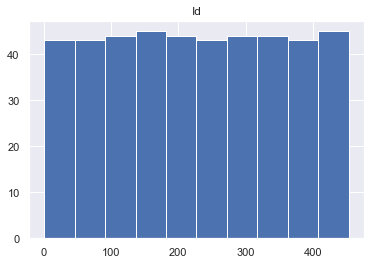

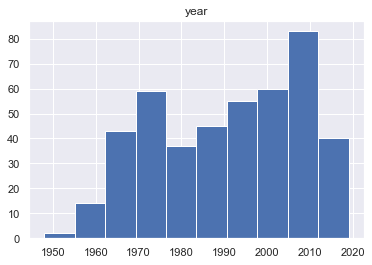

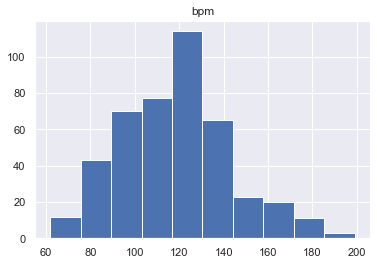

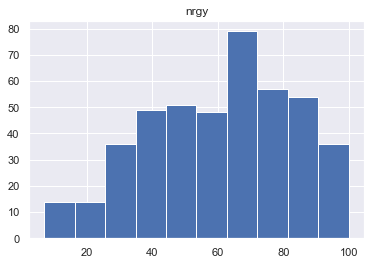

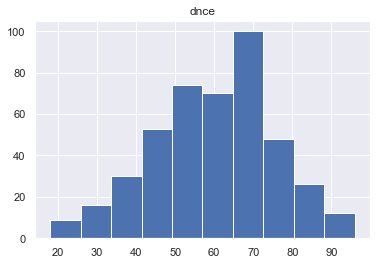

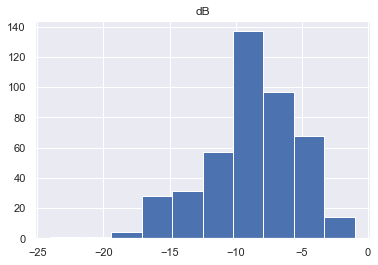

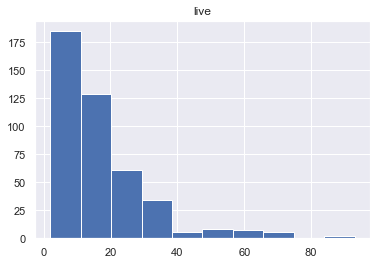

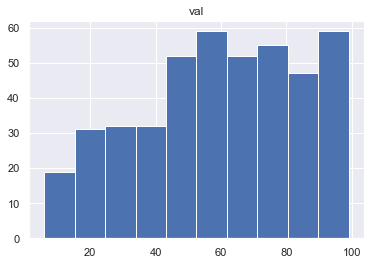

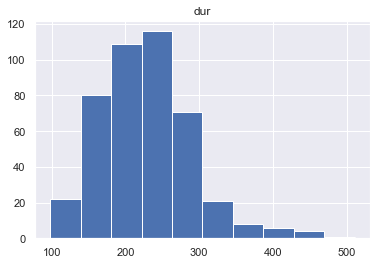

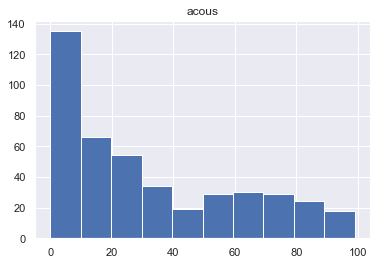

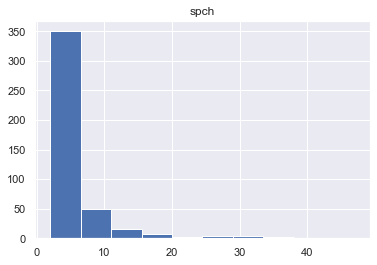

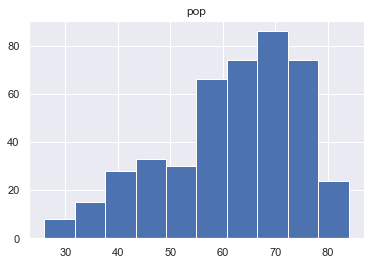

In [8]:
# Plot the various numerical values/ Continious Values and there distrobution 

for i in data.select_dtypes(np.number):
    plt.hist(data[i].values)
    plt.title(i)
    plt.show()
    

In [9]:
# Lets see the number of unique values in the categorical features 

for i in data.select_dtypes(np.object0):
    print(f"The amount of the unique values in {i} are {data[i].nunique()/data.shape[0] *100 } % ")
    

The amount of the unique values in title are 99.54337899543378 % 
The amount of the unique values in artist are 75.57077625570776 % 
The amount of the unique values in top genre are 19.63470319634703 % 


As you can see here "ID" Column is just the numbers from 1 to the sape of the data frame, we will drop the column! 
Also we the "songs colum has all the unique vales! although the song is important but all the values are unique thus its better we will eliminate that feaature !

In [10]:
data.drop(['Id', 'title'], axis= 1, inplace= True)

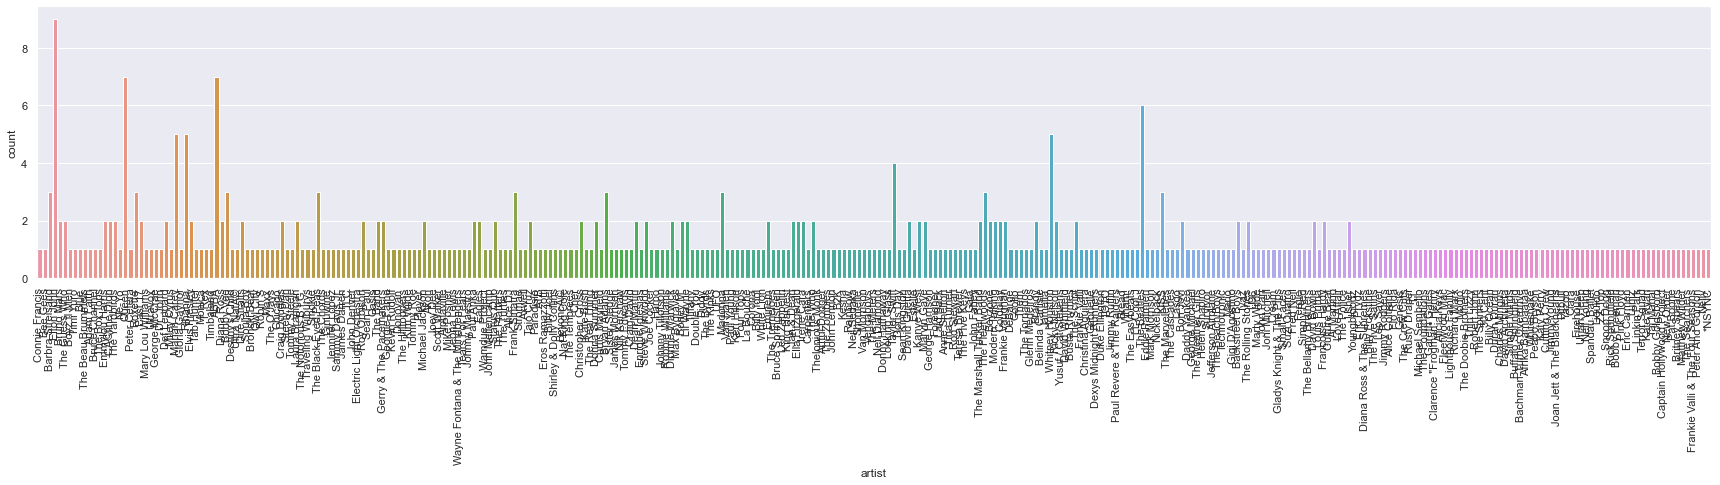

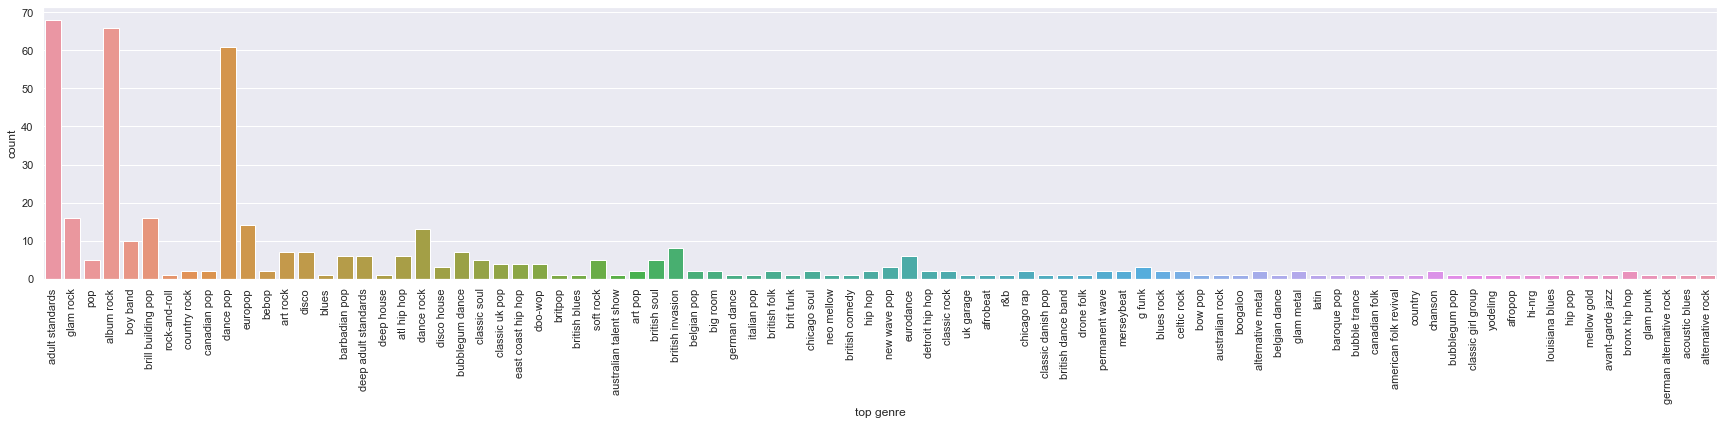

In [11]:
"""
Lets see the data distribution between the various categorical values 
"""

for i in data.select_dtypes(np.object0):
    plt.figure(figsize=(30,5))
    sns.countplot( x = i, data = data)
    plt.xticks(rotation = 90)
    plt.show()

As we can see that data has been equally distributed among all the datapoints! Except for few classes 

In [12]:
# Lets try to label encode the values 

from sklearn.preprocessing import LabelEncoder



label_dict = {}

for i in data.select_dtypes(np.object0): 

    le = LabelEncoder()
    label_dict[i] = le.fit(data[i])
    data[i] = label_dict[i].transform(data[i])

data.head()    


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,54,1,1996,107,31,45,-8,13,28,150,75,3,44
2,19,1,1979,105,36,63,-9,13,67,245,11,3,77
3,18,1,1980,170,28,47,-16,13,33,232,25,3,67
4,92,68,1973,121,47,56,-8,15,40,193,45,3,63
5,40,80,2010,110,56,71,-7,12,23,223,15,6,74


In [13]:
data.shape

(438, 13)